<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Natural Language Processing - Speech 2 Text - Whisper
</b></font> </br></p>



---

Transkribieren von Audiodaten mit Whisper

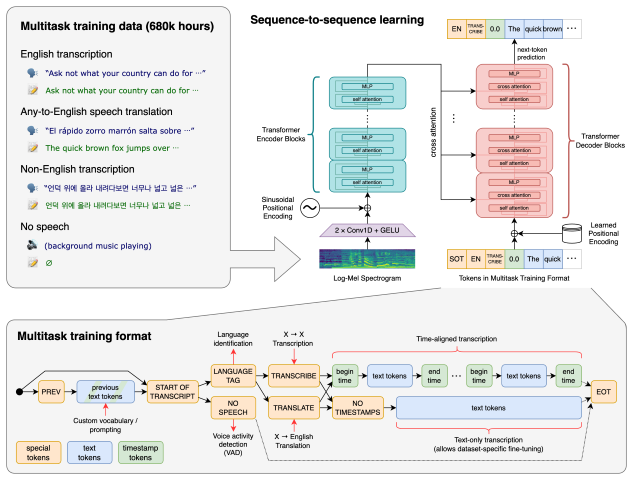

[Bild GitHub ](https://github.com/openai/whisper)

# **1 <font color='orange'>|</font> Understand**
---

<p><font color='black' size="5">
Warnungen ausschalten
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>


Bezahlen Sie für einen Onlinedienst, um Texttranskripte Ihrer Audiodateien zu erhalten? Und warum nicht ein Whisper-Modell von OpenAI nutzen, um diese Aufgabe zu erledigen ... kostenlos! Sie müssen ein Whisper-Modell für die sprachlichen Besonderheiten Ihrer Audiodateien spezialisieren? Kein Problem, dafür gibt es Feinabstimmungsskripte und Notebooks.








**Whisper** ist ein Allzweck-Spracherkennungsmodell. Es wird auf einem großen Datensatz unterschiedlicher Audiodaten trainiert und ist außerdem ein Multitasking-Modell, das mehrsprachige Spracherkennung, Sprachübersetzung und Sprachidentifizierung durchführen kann.


Es gibt fünf Modellgrößen, vier nur in englischer Sprache, die Kompromisse bei Geschwindigkeit und Genauigkeit bieten. Nachfolgend finden Sie die Namen der verfügbaren Modelle sowie deren ungefähren Speicherbedarf und relative Geschwindigkeit.

| Size    | Parameters | English-only model | Multilingual model | Required VRAM |
|--------|------------|--------------------|--------------------|---------------|
| tiny   | 39 M       | tiny.en            | tiny               | ~1 GB         |
| base   | 74 M       | base.en            | base               | ~1 GB         |
| small  | 244 M      | small.en           | small              | ~2 GB         |
| medium | 769 M      | medium.en          | medium             | ~5 GB         |
| large  | 1550 M     | N/A                | large              | ~10 GB        |


<p><font color='black' size="5">
Install & Import
</font></p>


[openai-whiper](https://pypi.org/project/openai-whisper/)

[GitHub](https://github.com/openai/whisper)

In [ ]:
# whisper
try:
    import whisper
except:
    !pip install -U -q openai-whisper
    import whisper

In [ ]:
# YouTube
try:
    from pytube import YouTube
except:
    !pip install -q pytube
    from pytube import YouTube

In [ ]:
# GoogleTranslator
try:
    from deep_translator import GoogleTranslator
except:
    !pip install -q deep_translator
    from deep_translator import GoogleTranslator

In [ ]:
# AudioSegment
try:
    from pydub import AudioSegment
except:
    !pip install -q pydub
    from pydub import AudioSegment

In [ ]:
# gTTS
try:
    from gtts import gTTS
except:
    !pip install -q gTTS
    from gtts import gTTS

In [ ]:
import os
import textwrap

<p><font color='black' size="5">
Ein paar hilfreiche Funktionen
</font></p>

In [ ]:
# Aus Video ein Audio erstellen
def video2audio(video_URL, destination, final_filename):
  video = YouTube(video_URL)
  audio = video.streams.filter(only_audio=True).first()
  output = audio.download(output_path = destination)
  _, ext = os.path.splitext(output)
  new_file = final_filename + '.mp3'
  os.rename(output, new_file)

In [ ]:
# lange Texte drucken
def prlong(txt):
  lines = textwrap.wrap(txt)
  for line in lines:
    print(line)

# **2 <font color='orange'>|</font> Prepare**
---

# **3 <font color='orange'>|</font> Model**
---

# **4 <font color='orange'>|</font> Evaluate**
---

# **5 <font color='orange'>|</font> Deploy**
---

# **A <font color='orange'>|</font> Einsatz trainiertes Modell**
---

<p><font color='black' size="5">
Fall 1 - Speech2Text
</font></p>

Laden das trainierten Sprachnodell

In [ ]:
%%time
model = whisper.load_model("medium")

Erstellen Audiodatei aus Video

In [ ]:
# Erlkönig
URL = 'https://www.youtube.com/watch?v=rRD1wc7Jtjc'
destination ='.'
filename = 'audio_file'
video2audio(URL, destination, filename)

Sprache in Text

In [ ]:
%%time
result = model.transcribe(filename + '.mp3')

In [ ]:
prlong(result['text'])

Erstellen der Ergebnisdateine (verschiedene Formate)

In [ ]:
from whisper.utils import get_writer
output_format="all"
output_dir="./"
output_writer = whisper.utils.get_writer(output_format, output_dir)
output_writer(result, (filename + '.srt'))

Lesen & Aufbereiten der Datei tsv

In [ ]:
import pandas as pd
df = pd.read_csv(filename +'.tsv', sep='\t' )

In [ ]:
cumulative_seconds = df.start / 1000
df['min'] = cumulative_seconds // 60
df['sec'] = cumulative_seconds % 60
df['min'] = df['min'].astype(int)
df['sec'] = df['sec'].astype(int)
df.drop(['start', 'end'], axis='columns', inplace=True)
df = df[['min', 'sec', 'text']]

In [ ]:
pd.set_option('display.max_colwidth', 120)
df.style.set_properties(**{'text-align': 'left'})

<p><font color='black' size="5">
Fall 2 - Speech2Text plus Übersetzung de - en
</font></p>

In [ ]:
%%time
result_en = model.transcribe(filename + '.mp3', task = 'translate')

In [ ]:
prlong(result_en['text'])

<p><font color='black' size="5">
Fall 3 - Übersetzung en - fr
</font></p>

In [ ]:
%%time
translation = GoogleTranslator(source='english', target='french').translate(result_en['text'])

In [ ]:
prlong(translation)

<p><font color='black' size="5">
Fall 4 - Text2Speech
</font></p>

In [ ]:
%%time
tts = gTTS(result['text'], lang='de')
tts.save('output.mp3')
mp3_file = '/content/output.mp3'
audio = AudioSegment.from_file(mp3_file, format="mp3")
audio

In [ ]:
# %%time
# tts = gTTS(translation, lang='fr')
# tts.save('output.mp3')
# mp3_file = '/content/output.mp3'
# audio = AudioSegment.from_file(mp3_file, format="mp3")
# audio

# **C <font color='orange'>|</font> Direkter Aufruf**
---

In [ ]:
# !whisper -h

In [ ]:
# !whisper '/content/audio_file.mp3' --model medium